In [119]:
from nltk.tokenize import word_tokenize
from typing import List
import spacy
import nltk
import numpy as np
import pandas as pd
import csv
import re

## Data pre-processing

In [21]:
def lowercaser ( text : str):
    return text.lower()

In [22]:
input_text = ['The nation of Panem? consists of a wealthy Capitol and twelve poorer districts.\
              As punishment for a past rebellion, each district must provide a boy and girl  \
              between the ages of 12 and 18 selected by lottery  for the annual Hunger Games.']
lower_text = lowercaser(input_text[0])

## Special character removal

In [23]:
def special_character_remover(text :str):

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text

In [24]:
special_character_removed =  special_character_remover(lower_text)
special_character_removed

'the nation of panem consists of a wealthy capitol and twelve poorer districts              as punishment for a past rebellion each district must provide a boy and girl                between the ages of  and  selected by lottery  for the annual hunger games'

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/amir/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Tokenization

In [26]:
def tokenizer(text : str):

    tokens = word_tokenize(text)
    return(tokens)


In [27]:
tokenized = tokenizer(special_character_removed)
tokenized

['the',
 'nation',
 'of',
 'panem',
 'consists',
 'of',
 'a',
 'wealthy',
 'capitol',
 'and',
 'twelve',
 'poorer',
 'districts',
 'as',
 'punishment',
 'for',
 'a',
 'past',
 'rebellion',
 'each',
 'district',
 'must',
 'provide',
 'a',
 'boy',
 'and',
 'girl',
 'between',
 'the',
 'ages',
 'of',
 'and',
 'selected',
 'by',
 'lottery',
 'for',
 'the',
 'annual',
 'hunger',
 'games']

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/amir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# print(stop_words)

## Removing stopwords

In [30]:
nlp = spacy.load('en_core_web_sm')
from nltk.corpus import stopwords

def stopwords_remover (text : List[str]) :

    stop_words = set(stopwords.words('english'))

    tokens = [word for word in text if word not in stop_words]
    removed = [word for word in text if word in stop_words]
    return tokens, removed


In [31]:
stopwords_removed, removed_words = stopwords_remover(tokenized)

print(stopwords_removed)
# print(removed_words)

['nation', 'panem', 'consists', 'wealthy', 'capitol', 'twelve', 'poorer', 'districts', 'punishment', 'past', 'rebellion', 'district', 'must', 'provide', 'boy', 'girl', 'ages', 'selected', 'lottery', 'annual', 'hunger', 'games']


## Stemming/lemmetization

In [32]:
from nltk.stem import PorterStemmer

# nlp = spacy.load('en_core_web_sm')

def stem_text(text: List[str]) -> List[str] :
        
    doc = nlp(' '.join(text))

    stemmer = PorterStemmer()
    
    stemmed_tokens = [stemmer.stem(token.text) for token in doc if token.is_alpha]

    return " ".join(stemmed_tokens)


In [33]:
stemmed_text = stem_text(stopwords_removed)
# stemmed_text = [token for token in stemmed_text.split()]
print(stemmed_text)


nation panem consist wealthi capitol twelv poorer district punish past rebellion district must provid boy girl age select lotteri annual hunger game


In [34]:
# Playing around with the Spellchecker class! You can ignore this!

from spellchecker import SpellChecker
spell = SpellChecker()

print([spell.correction(word) for word in stemmed_text])


['n', 'a', 't', 'i', 'o', 'n', 'i', 'p', 'a', 'n', 'e', 'm', 'i', 'c', 'o', 'n', 's', 'i', 's', 't', 'i', 'w', 'e', 'a', 'l', 't', 'h', 'i', 'i', 'c', 'a', 'p', 'i', 't', 'o', 'l', 'i', 't', 'w', 'e', 'l', 'v', 'i', 'p', 'o', 'o', 'r', 'e', 'r', 'i', 'd', 'i', 's', 't', 'r', 'i', 'c', 't', 'i', 'p', 'u', 'n', 'i', 's', 'h', 'i', 'p', 'a', 's', 't', 'i', 'r', 'e', 'b', 'e', 'l', 'l', 'i', 'o', 'n', 'i', 'd', 'i', 's', 't', 'r', 'i', 'c', 't', 'i', 'm', 'u', 's', 't', 'i', 'p', 'r', 'o', 'v', 'i', 'd', 'i', 'b', 'o', 'y', 'i', 'g', 'i', 'r', 'l', 'i', 'a', 'g', 'e', 'i', 's', 'e', 'l', 'e', 'c', 't', 'i', 'l', 'o', 't', 't', 'e', 'r', 'i', 'i', 'a', 'n', 'n', 'u', 'a', 'l', 'i', 'h', 'u', 'n', 'g', 'e', 'r', 'i', 'g', 'a', 'm', 'e']


## Creating corpus

In [35]:
def corpus_creater (descriptions : List[List[str]]) -> List[str]:
    corpus = []

    for description in descriptions:
        stemmed = stem_text(stopwords_remover(tokenizer(special_character_remover(lowercaser(description[0])))))
        corpus.append(stemmed)

    return corpus
    

In [159]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from typing import List
import matplotlib.pyplot as plt
import spacy
import nltk
import re


class PreProcessor():

    nlp = spacy.load('en_core_web_sm')    

    def __init__(self, descriptions : List[List[str]]):

        self.descriptions = descriptions
        self.corpus = []

    def lowercaser(self, text : List[str]) -> str:
        return text[0].lower().replace("'", "")
    
    def special_character_remover(self, text :str) -> str:

        # Removes ulrs and numbers in the text
        url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
        clean_text = re.sub(url_pattern, '', text)
        clean_text = re.sub(r'[^a-zA-Z\s]', '', clean_text)  
        return clean_text 
        
    def tokenizer(self , text : str) -> List[str]:

        tokens = word_tokenize(text)
        return(tokens)

    def stopwords_remover (self,  text : List[str]) -> List[str] :

        stop_words = set(stopwords.words('english'))

        tokens = [word for word in text if word not in stop_words]
        # removed = [word for word in text if word in stop_words]
        return tokens


    def stem_text(self, text: List[str]) -> List[str] :
            
        doc = nlp(' '.join(text))

        stemmer = PorterStemmer()
        
        stemmed_tokens = [stemmer.stem(token.text) for token in doc if token.is_alpha]
        
        return stemmed_tokens
    
    def lemmatizer(self , list_of_tokens : List[str]) -> str:
    
        lemmatized_tokens_list = []
        
        for token in list_of_tokens: 
            token = WordNetLemmatizer().lemmatize(token)
            lemmatized_tokens_list.append(token)
            
        return " ".join(lemmatized_tokens_list)

    
    def corpus_creater (self) -> List[List[str]]:

        for description in self.descriptions:
            cleaned = self.lemmatizer(
                                      self.stem_text(\
                                      self.stopwords_remover(\
                                      self.tokenizer(\
                                      self.special_character_remover(\
                                      self.lowercaser(description)
                                      )))))
            self.corpus.append(cleaned)

        return self.corpus

    def visualizer(self):

        text = " ".join(self.corpus)
        wordcloud = WordCloud(
            width=2048, 
            height=2048, 
            background_color='black', 
            mode='RGBA',
            max_words=200, 
            colormap='prism', 
            contour_color='blue', 
            contour_width=0.5,                 
        ).generate(text)
        plt.figure(figsize=(15,15))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        

In [160]:

input_text = [["The story begins with Hannah's brother, a young Jewish teen, as she is completing her senior year of high school. Her small neighborhood in Brooklyn is falling apart and SING! is one of the only traditions keeping the neighborhood alive. Newly arrived teacher, Miss Lombardo grew up in the neighborhood but returned to be their Sing Leader. One cold Christmas night, Miss Lombardo is leaving a neighborhood party when a young man hails her a cab, then attempts to mug her. In self defense, she bites his hand to release his grip and he screams in pain and terror, quickly making an exit. The cab driver jokes about not starting the meter yet. On the first day of school, Miss Lombardo runs into difficulty when her students are uninterested and misbehaved. One such student was named Dominic who gets scolded for bringing stolen watches to school grounds and putting his feet up on the desk. On the day of Sing Leader elections, Miss Lombardo recognizes Dominic as her mugger by the bandage on his hand and decides to blackmail him into being co-Sing Leader of the Senior class along with Hannah, who was rightfully elected. The school kids work hard to plan their Sing productions. Hannah and Dominic clash along the way as Hannah uses traditional Sing planning strategies while Dominic wants to introduce the flavor of the youth in the neighborhood. In order to put Dominic and Hannah on the same page, Miss Lombardo suggests that Hannah accompany Dominic to a local club. At first, the two are equally hesitant but Hannah agrees on the terms that it is not a date. However, by the end of the night, Hannah uses Dominic to make her ex boyfriend, Mickey, jealous, and due to this, Hannah and Dominic start seeing each other in a different light. Dominic accompanies Hannah on her walk home and the two share a romantic kiss. Once the two are finally uniting and getting along, the Dept. of Education informs the school that it will close its doors forever at the end of this semester and therefore, there will not be enough resources for them to complete this year's Sing. This fuels the kids to work even harder on their productions and the neighborhood comes together even more to help finance the show, despite the school authorities' ban. Ironically, just as things are starting to look up, Dominic reluctantly accompanies his brother on a robbery of Hannah's mother's diner, their sole source of income which already was at risk of failure due to the school's upcoming closure. A classmate saw Dominic standing outside the diner at the time of the crime and informed Hannah of what he saw. Devastated, Hannah confronts Dominic and he promises to get the money back for her. He then steals the money back from his brother and returns it to the diner, restoring Hannah's faith in him. The recent events had discouraged Dominic from fulfilling his co-Sing leader duties and he had been skipping out on rehearsals. In a moment of great need as the senior's main performer falls unconscious, Dominic steps in to save the show. He sheds his bad-boy demeanor and exceeds all expectations. The underclassmen and seniors perform to a record-high sold out audience. At the end of the show, Hannah makes a moving speech motivating the community to rejoice and always remember that despite compromising circumstances, they completed a successful Sing and proved their community's worth."],\
              ["Set in a lonely city on a rainy night, the film takes place in a bicycle shop  that is closed for the night. In the corner of the shop sleeps Red, a red unicycle who languishes in the clearance corner, waiting to be purchased. As the camera zooms on him, the sound of rain falling turns into a drumroll, and we go into the dream-sequence. In his dream, Red is being ridden by a circus clown  as part of a juggling act. The clown enters the ring, accompanied by a fanfare, expecting a huge applause, but instead receives only a few scattered claps from different parts of the  audience. Nevertheless, Lumpy starts juggling three balls whilst riding Red, occasionally dropping them as he does. However, Red slides out from underneath Lumpy  and spikes the balls back to him with his bike pedals. The confused clown ponders this for only a second before continuing on with his act. At this point, Red is forced to catch another ball which Lumpy unintentionally throws across the ring. Lumpy continues to ride in the air while juggling the other two balls while Red bounces the green ball up and down. Eventually Lumpy comes to a sudden realization, and looks between his legs, only to discover he's been riding on nothing before he falls to the ground . Red catches the other two balls and begins juggling all three of them, and then balances them on top of each other, after which he receives an uproarous applause. But then the sound of clapping turns into the sound of rain, and Red awakens, left to face bleak reality. Depressed, he returns to the corner where he was previously resting, and goes back to sleep. The short ends with the final image of the neon sign for Eben's Bikes."],
              ["The president is on his way to give a speech. While he is traveling there a man shows up with a camera. A reporter tries to ask a member of the secret service a question. When the president enters he is shot by the man with the camera. The president's main bodyguard, Alex Thomas , is grazed by the bullet that hits the president. The shooter is gunned down by Alex and other secret service agents. The president dies at the hospital. Kate Crawford , an investigative journalist, starts asking questions about the assassination. Anyone she questions is killed. She goes to Alex Thomas's house to tell him what is happening. As they head to his boat, Thomas sees some men hiding in the bushes. He throws Kate into the water and dives in. Thomas jumps out of the water to kill two of the hitmen while a third hitman drives off to inform his boss what happened. They are able to link the hitmen to a man called Jack Baldwin . Agent Thomas and other Secret Service members attack the location of Jack Baldwin. Baldwin escapes but is later caught by Thomas. Thomas and Crawford are suspicious of Vaughan Stevens , Agent Thomas's boss, who had previous links to Baldwin. While reviewing film of the assassination at his house, Thomas discovers that Stevens handed the assassin a gun during the president's entrance. Thomas leaves to find Stevens while Kate stays at his house. When Thomas arrives at Stevens' home he finds him dead. Before entering, Thomas sees a car leaving the house. He then receives a call that Baldwin has escaped. Kate is attacked by Baldwin but Thomas arrives and kills Baldwin. Thomas arrives at the first lady's  home to see the car that left Steven's house pulling away. Thomas discovers that the first lady wanted her husband killed - due to the fact that the President was being unfaithful to her. A few weeks later Kate and Thomas have dinner. Thomas says that he still doesn't know who wanted the President dead."],              
              ['A wife s husband is cheating on her. She decides to go on a road trip with her husband s other woman. While driving the two women pick up a hitchhiker. The man they pick up may be a robber and murderer on the run from the cops. A policeman who is tracking the hitchhiker has a close eye on them, but the question is why?http://www.imdb.com/title/tt0112515']
              ]

pp = PreProcessor(input_text)
corrpus = pp.corpus_creater()
corrpus

['stori begin hannah brother young jewish teen complet senior year high school small neighborhood brooklyn fall apart sing one tradit keep neighborhood aliv newli arriv teacher miss lombardo grew neighborhood return sing leader one cold christma night miss lombardo leav neighborhood parti young man hail cab attempt mug self defens bite hand releas grip scream pain terror quickli make exit cab driver joke start meter yet first day school miss lombardo run difficulti student uninterest misbehav one student name domin get scold bring stolen watch school ground put foot desk day sing leader elect miss lombardo recogn domin mugger bandag hand decid blackmail cose leader senior class along hannah right elect school kid work hard plan sing product hannah domin clash along way hannah use tradit sing plan strategi domin want introduc flavor youth neighborhood order put domin hannah page miss lombardo suggest hannah accompani domin local club first two equal hesit hannah agre term date howev end

In [41]:

from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
genres = [
#  ['Drama'],
 ['Drama', 'Horror', 'Thriller'],
 ['Drama'],
 ['Children', 'Drama'],
 ['Comedy', 'Drama', 'Horror', 'Thriller'],
 ['Comedy', 'Drama','Children', 'Horror', 'Thriller']]

multilabel_binarizer.fit(genres)

# transform target variable
y = multilabel_binarizer.transform(genres)
print(y)

[[0 0 1 1 1]
 [0 0 1 0 0]
 [1 0 1 0 0]
 [0 1 1 1 1]
 [1 1 1 1 1]]


In [42]:
multilabel_binarizer.inverse_transform(y[[0]])

[('Drama', 'Horror', 'Thriller')]

### Bert model for creating embeddings

In [52]:
# import torch
# from transformers import BertTokenizer, BertModel

# # Example data
# text = "Set in a lonely city on a rainy night, the film takes place in a bicycle shop  that is closed for the night. In the corner of the shop sleeps Red, a red unicycle who languishes in the clearance corner, waiting to be purchased. As the camera zooms on him, the sound of rain falling turns into a drumroll, and we go into the dream-sequence. In his dream, Red is being ridden by a circus clown  as part of a juggling act. The clown enters the ring, accompanied by a fanfare, expecting a huge applause, but instead receives only a few scattered claps from different parts of the  audience. Nevertheless, Lumpy starts juggling three balls whilst riding Red, occasionally dropping them as he does. However, Red slides out from underneath Lumpy  and spikes the balls back to him with his bike pedals. The confused clown ponders this for only a second before continuing on with his act. At this point, Red is forced to catch another ball which Lumpy unintentionally throws across the ring. Lumpy continues to ride in the air while juggling the other two balls while Red bounces the green ball up and down. Eventually Lumpy comes to a sudden realization, and looks between his legs, only to discover he's been riding on nothing before he falls to the ground . Red catches the other two balls and begins juggling all three of them, and then balances them on top of each other, after which he receives an uproarous applause. But then the sound of clapping turns into the sound of rain, and Red awakens, left to face bleak reality. Depressed, he returns to the corner where he was previously resting, and goes back to sleep. The short ends with the final image of the neon sign for Eben's Bikes."

# # Load BERT tokenizer and model
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

# # Tokenize input text and get BERT embeddings
# inputs = tokenizer(text, return_tensors='pt')
# outputs = model(**inputs)


In [4]:
# x = outputs.last_hidden_state.detach().numpy()
# x.shape

(1, 376, 768)

In [161]:

df = pd.read_csv('./Dataset_MovieSummaries/Dataset.csv')
df = df.drop(columns=['Unnamed: 0','movie_id','movie_name'])

In [162]:
df['summary']

0        Constance Harding is an unhappy orphan who wil...
1        Teenager Ellie is distressed by forces that th...
2        Prabhu is a kind-hearted poor man who works as...
3        On a visit to scenic Agra, Pooja  meets with a...
4        Pilar, a meek housewife living in Toledo, gath...
                               ...                        
14009    Besides the name of the heroine and her freigh...
14010    A wife s husband is cheating on her. She decid...
14011    Charles Hodgson is a British aristocrat who de...
14012    A prison inmate  receives early release only t...
14013    The film takes place in Marseille, France, and...
Name: summary, Length: 14014, dtype: object

### Processing the movie descriptions, creating corpus

In [164]:
%%time
summaries = [[summary] for summary in df['summary']]
processor = PreProcessor(summaries)
cleaned_summaries = processor.corpus_creater()

CPU times: user 7min 41s, sys: 32.9 s, total: 8min 14s
Wall time: 8min 17s


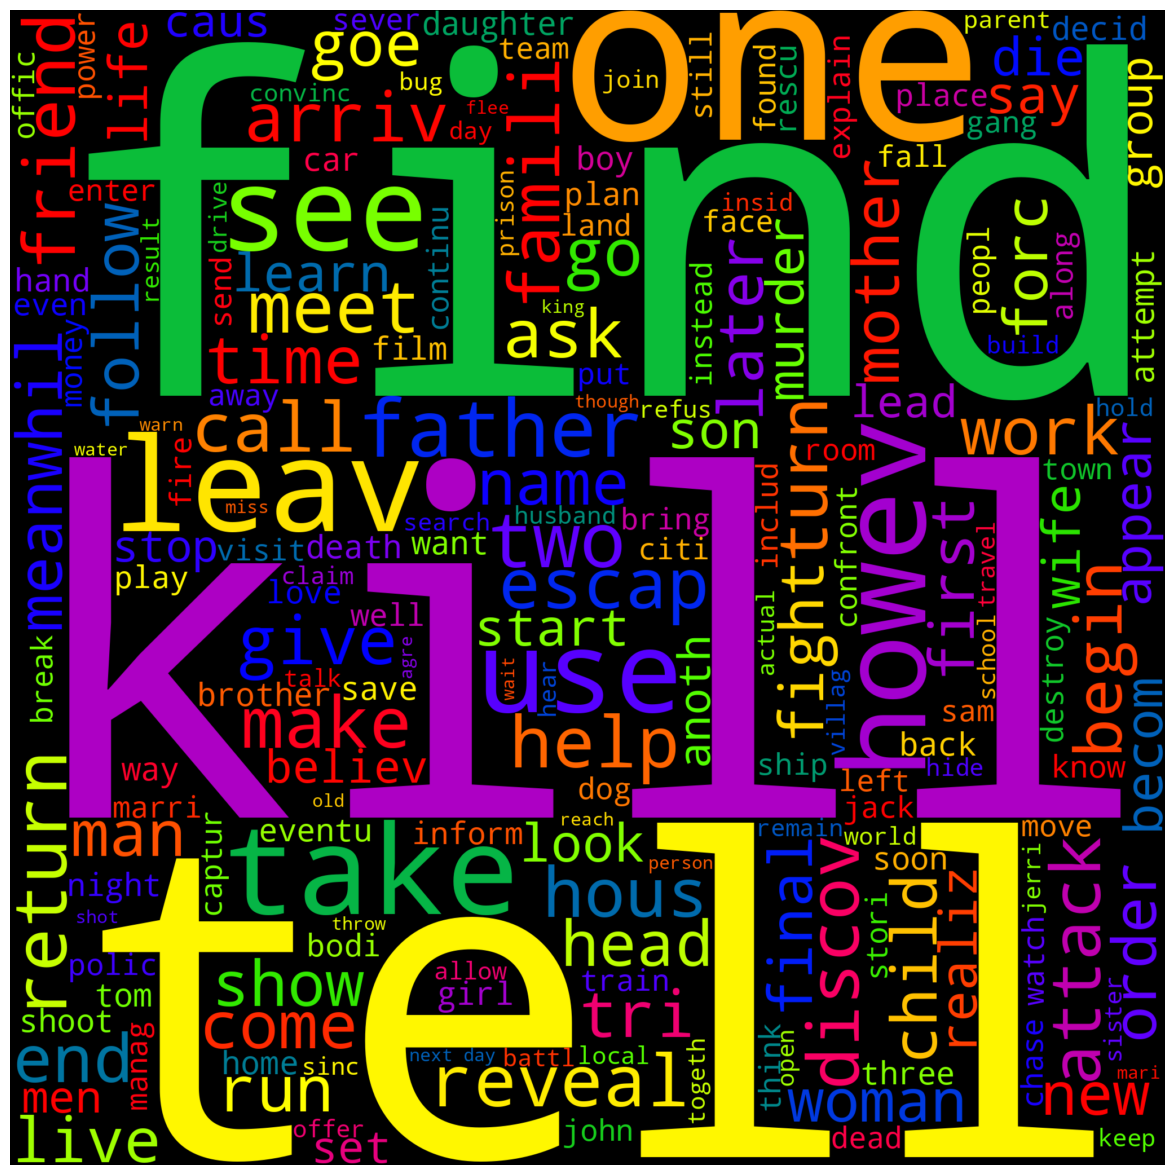

In [165]:
processor.visualizer()

In [166]:
# Replacing with processed summary
df['summary'] = cleaned_summaries

In [167]:
X = df['summary']
Y = df.loc[:, df.columns != 'summary']
X

0        constanc hard unhappi orphan soon graduat miss...
1        teenag elli distress forc threaten special fam...
2        prabhu kindheart poor man work cooli bu stand ...
3        visit scenic agra pooja meet renown artist kab...
4        pilar meek housewif live toledo gather belong ...
                               ...                        
14009    besid name heroin freight ride littl film bear...
14010    wife husband cheat decid go road trip husband ...
14011    charl hodgson british aristocrat decid becom t...
14012    prison inmat receiv earli releas immedi rejoin...
14013    film take place marseil franc involv aspir rac...
Name: summary, Length: 14014, dtype: object

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 123)
tfidf = TfidfVectorizer(max_features=10000, min_df=20 , ngram_range=(1,3))

# Fit the vectorizer to the training data
tfidf.fit(X_train)

# Transform both train and test sets
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# pickle tfidf model for later use
joblib.dump(tfidf, 'models/my_tfidf_min20.pkl')


['models/my_tfidf_min20.pkl']

In [133]:
X_train_tfidf


<11211x6603 sparse matrix of type '<class 'numpy.float64'>'
	with 1238431 stored elements in Compressed Sparse Row format>

In [125]:
X_test_tfidf

<2803x6603 sparse matrix of type '<class 'numpy.float64'>'
	with 309099 stored elements in Compressed Sparse Row format>

In [169]:
%%time
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray())
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray())
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

X_train_tfidf_df.to_csv('./Dataset_MovieSummaries/X_train.csv')
X_test_tfidf_df.to_csv('./Dataset_MovieSummaries/X_test.csv')
y_train_df.to_csv('./Dataset_MovieSummaries/y_train.csv', header=True)
y_test_df.to_csv('./Dataset_MovieSummaries/y_test.csv', header=True)

CPU times: user 1min 40s, sys: 11.1 s, total: 1min 51s
Wall time: 1min 52s
